## Networkx

In [1]:
import networkx as nx

In [2]:
# 创建有向图
G = nx.DiGraph()

# 有向图之间边的关系
edges = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'D'), ('C', 'A'), ('D', 'B'), ('D', 'C')]

In [3]:
for edge in edges:
  G.add_edge(edge[0], edge[1])

In [4]:
# 有向图可视化
# layout = nx.spring_layout(G)
# layout = nx.circular_layout(G)
layout = nx.shell_layout(G)

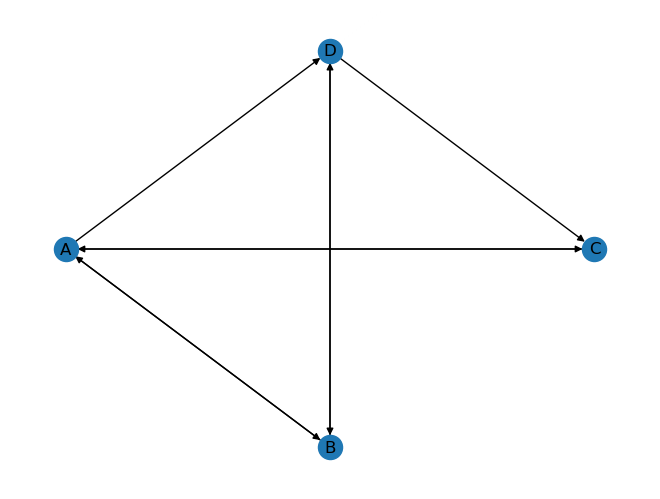

In [5]:
nx.draw(G, pos=layout, with_labels=True)

In [6]:
pagerank_list = nx.pagerank(G, alpha=1)
print('pagerank 值为: {}'.format(pagerank_list))

pagerank 值为: {'A': 0.33333396911621094, 'B': 0.22222201029459634, 'C': 0.22222201029459634, 'D': 0.22222201029459634}


In [7]:
pagerank_list = nx.pagerank(G, alpha=0.85)
print('pagerank 值为: {}'.format(pagerank_list))

pagerank 值为: {'A': 0.3245609358176832, 'B': 0.2251463547274389, 'C': 0.2251463547274389, 'D': 0.2251463547274389}


## Hillary Emails

In [8]:
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [9]:
# 数据加载
emails = pd.read_csv('dataset/pagerank/Emails.csv')
# 读取别名文件
alias_files = pd.read_csv('dataset/pagerank/Aliases.csv')

aliases = {}
# 别名 => PersonalID
for index, row in alias_files.iterrows():
  aliases[row['Alias']] = row['PersonId']

# 读取人名文件
person_files = pd.read_csv('dataset/pagerank/Persons.csv')

persons = {}
# PersonID => Name
for index, row in person_files.iterrows():
  persons[row['Id']] = row['Name']

In [10]:
# 针对别名进行转换 Alias => Name
def unify_name(name):
  # 姓名统一小写
  name = str(name).lower()
  # 去掉`,`和`@`后面的内容
  name = name.replace(',', '').split('@')[0]
  # 别名转换
  if name in aliases.keys():
    return persons[aliases[name]]
  return name


In [11]:
# 绘制网络图

def show_graph(graph, type='sprint_layout'):
  if type == 'sprint_layout':
    # 使用 Spring Layout 布局, 类似中心放射状
    positions = nx.spring_layout(graph)
  if type == 'circular_layout':
    # 使用 Circular Layout 布局, 在一个圆环上均匀分布
    positions = nx.circular_layout(graph)
  
  # 设置网络图中的节点大小, 大小与 pagerank 值相关,因为 pagerank 值很小所以需要*2000
  nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
  # 设置网络中的边长度
  edgesize = [(np.sqrt(e[2]['weight']))/5 for e in graph.edges(data=True)]

  fig, ax = plt.subplots(figsize=(12, 8))
  # 绘制节点
  nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4, ax=ax)
  # 绘制边
  nx.draw_networkx_edges(graph, positions, width=edgesize, edge_color='r', alpha=0.5, ax=ax)
  # 绘制节点的 label
  nx.draw_networkx_labels(graph, positions, font_size=10, ax=ax)
  # 输出邮件中所有人物关系图
  plt.show()

In [12]:
# 将寄件人和收件人的姓名规范化
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)

In [13]:
# 设置边的权重等于发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
  temp = (row[0], row[1])
  if temp not in edges_weights_temp:
    edges_weights_temp[temp] = 1
  else:
    edges_weights_temp[temp] = edges_weights_temp[temp] + 1

print(edges_weights_temp)
print('-' * 100)

defaultdict(<class 'list'>, {('Jake Sullivan', 'Hillary Clinton'): 815, ('nan', 'Hillary Clinton'): 20, ('Cheryl Mills', ';h'): 1, ('Cheryl Mills', 'Hillary Clinton'): 1182, ('Hillary Clinton', 'Huma Abedin'): 32, ('Hillary Clinton', 'russorv'): 26, ('slaughter anne-marie', 'Hillary Clinton'): 126, ('Harold Hongju Koh', 'Hillary Clinton'): 12, ('Wendy Sherman', 'Hillary Clinton'): 7, ('Jake Sullivan', 'Wendy Sherman'): 1, ('Hillary Clinton', 'sullivanjj'): 288, ('Sidney Blumenthal', 'Hillary Clinton'): 361, ('Burns Strider', 'Hillary Clinton'): 2, ('Huma Abedin', 'Hillary Clinton'): 1322, ('Cheryl Mills', 'Cheryl Mills'): 17, ('Robert Russo', 'Hillary Clinton'): 22, ('Capricia Marshall', 'Cheryl Mills'): 2, ('Hillary Clinton', 'Oscar Flores'): 5, ('William Burns', 'Hillary Clinton'): 10, ('Monica Hanley', 'Hillary Clinton'): 24, ('Hillary Clinton', 'abedinh'): 345, ('Hillary Clinton', 'millscd'): 298, ('Daniel Schwerin', 'Hillary Clinton'): 9, ('Hillary Clinton', 'hanleymr'): 33, ('Mon

In [16]:
# 转化格式(from, to), weight => from, to, weight
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]

In [17]:
# 创建一个有向图
graph = nx.DiGraph()
# 设置有向图中的路径及权重(from, to, weight)
graph.add_weighted_edges_from(edges_weights)
# 计算每个节点(人物)的 PR 值, 并作为节点的 pagerank 属性
pagerank = nx.pagerank(graph)
print('pagerank=', pagerank)
print('-' * 100)

pagerank= {'Jake Sullivan': 0.005791704166582628, 'Hillary Clinton': 0.30625575336382355, 'nan': 0.1399922706144682, 'Cheryl Mills': 0.009358382485728883, ';h': 0.0008967850871949972, 'Huma Abedin': 0.010664457957706467, 'russorv': 0.00441488880220642, 'slaughter anne-marie': 0.0014117298616107966, 'Harold Hongju Koh': 0.0009914506387867284, 'Wendy Sherman': 0.001167379949354898, 'sullivanjj': 0.040032942578700825, 'Sidney Blumenthal': 0.007543328643239098, 'Burns Strider': 0.0010366588039860966, 'Robert Russo': 0.0008904426392777104, 'Capricia Marshall': 0.0017166548334911877, 'Oscar Flores': 0.0016529953921253027, 'William Burns': 0.001161553882579919, 'Monica Hanley': 0.0008904426392777104, 'abedinh': 0.048657946760805086, 'millscd': 0.04143526549410871, 'Daniel Schwerin': 0.0009243019859440608, 'hanleymr': 0.005370314170153714, 'Philippe Reines': 0.009023759500896622, 'Thomas Nides': 0.0009399158462110822, 'jilotylc': 0.0316071729502178, 'Melanne Verveer': 0.0022459988557887523, 'C

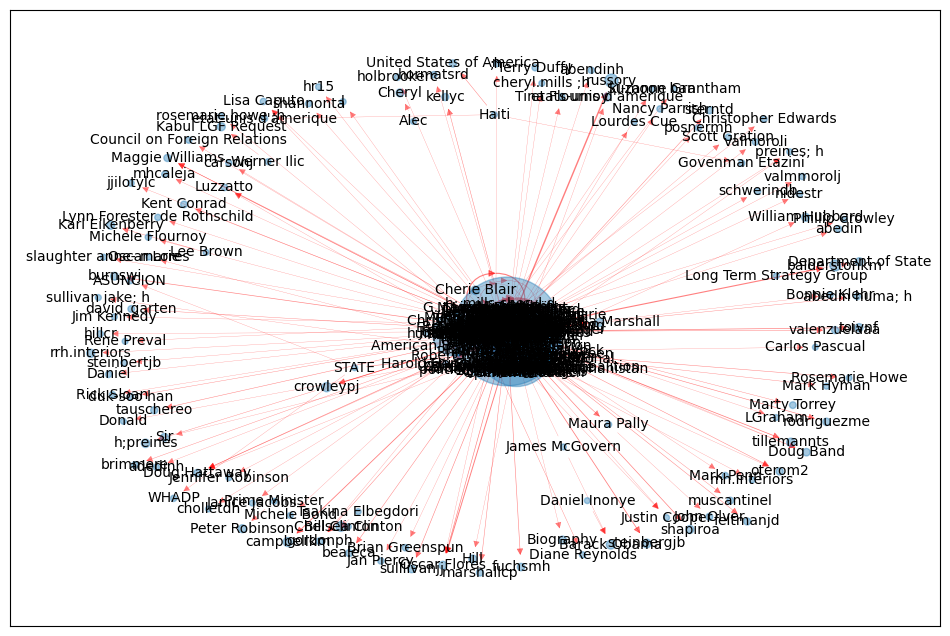

In [18]:
# 获取每个节点的 pagerank 数值
pagerank_list = {node: rank for node, rank in pagerank.items()}
# 将 pagerank 数值作为节点的属性
nx.set_node_attributes(graph, name='pagerank', values=pagerank_list)
# 画网络图
show_graph(graph, 'sprint_layout')

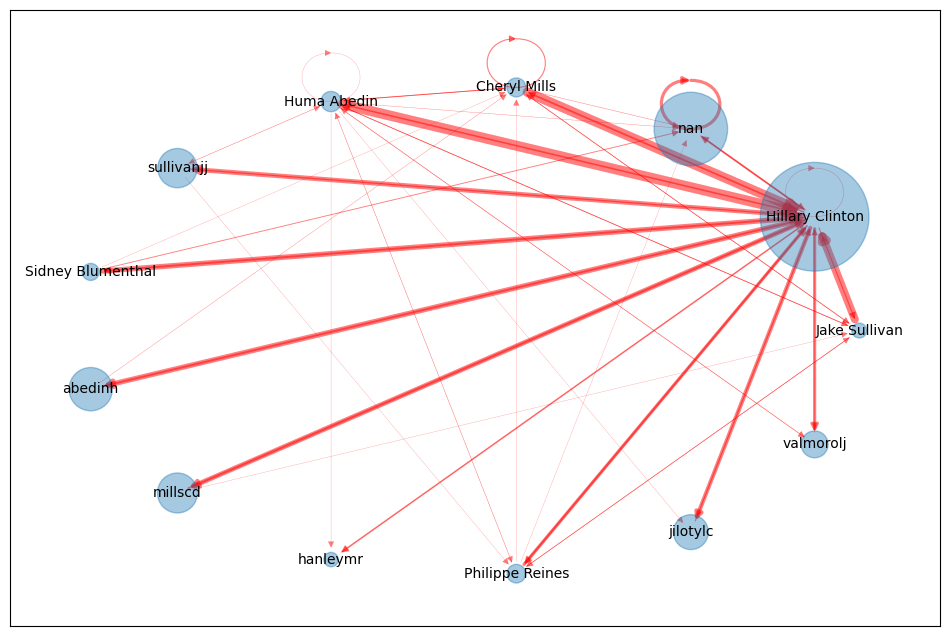

In [19]:
# 将完整的图谱进行精简
# 设置 PR 值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉 PR 值小于 pagerank_threshold 的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph, 'circular_layout')

In [135]:
a = [1, 2, 3]
b = [4, 5, 6]
c = [4, 5, 6, 7, 8]
zipped = zip(a, b)
zipped

In [125]:
print(type(zipped))

<class 'zip'>


In [126]:
list(zipped)

[(1, 4), (2, 5), (3, 6)]

In [127]:
list(zip(a, c))

[(1, 4), (2, 5), (3, 6)]

In [128]:
c1, c2 = zip(*zip(a, b))
list(c1)

[1, 2, 3]

In [130]:
list(c2)

[4, 5, 6]

In [137]:
for a in zipped:
  print('a: {}'.format(a))

a: (1, 4)
a: (2, 5)
a: (3, 6)


In [136]:
list(zip(a, b, c))

[(1, 4, 4), (2, 5, 5), (3, 6, 6)]